In [28]:
from PIL import Image
import cv2
import numpy as np
import requests
from PIL import Image
import requests
from io import BytesIO

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO

In [9]:


# Get the image from URL
response = requests.get('https://editor.analyticsvidhya.com/uploads/133971.png')
image = Image.open(BytesIO(response.content))

# Resize the image
image = image.resize((450, 250))
image.show()
image_arr = np.array(image)

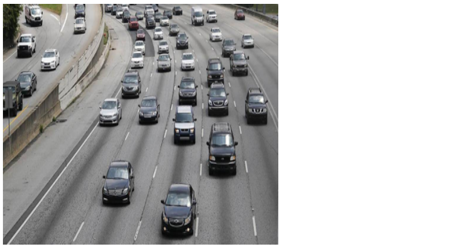

In [10]:
image

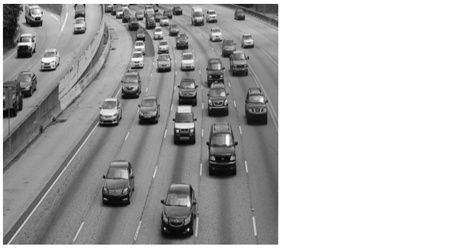

In [11]:
gray = cv2.cvtColor(
    image_arr,
    cv2.COLOR_BGR2GRAY
)

Image.fromarray(gray)

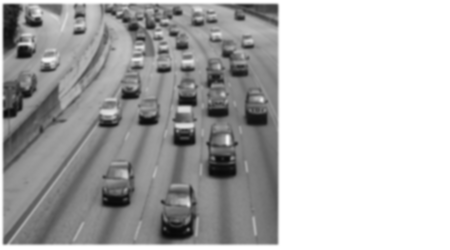

In [12]:
blur = cv2.GaussianBlur(gray, (5,5), 0)
Image.fromarray(blur)

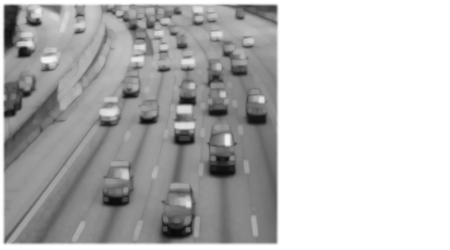

In [14]:
dilated = cv2.dilate(
    blur, np.ones((3,3))
)

Image.fromarray(dilated)

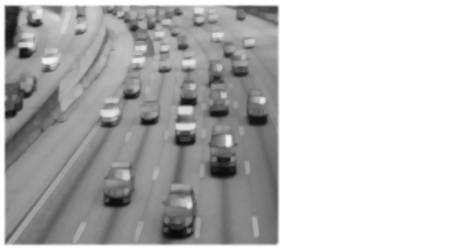

In [15]:
kernel = cv2.getStructuringElement(
    cv2.MORPH_ELLIPSE, (2,2)
)

closing = cv2.morphologyEx(
    dilated, cv2.MORPH_CLOSE, kernel
)

Image.fromarray(closing)

In [17]:
car_cascade_src = '/content/cars.xml'
car_cascade = cv2.CascadeClassifier(
    car_cascade_src
)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

In [18]:
cars

array([[130,  24,  27,  27],
       [170,  30,  27,  27],
       [124,  19,  54,  54],
       [ 11,  37,  28,  28],
       [197,  87,  43,  43],
       [223,  85,  58,  58],
       [161, 111,  46,  46],
       [199, 138,  52,  52],
       [ 92, 177,  43,  43]], dtype=int32)

9  cars found


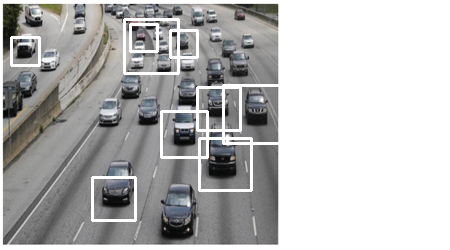

In [20]:
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(
      image_arr, (x,y),(x+w,y+h),
      (255,0,0), 1
  )
  cnt+=1
print(cnt, " cars found")
Image.fromarray(image_arr)

In [21]:
# Reading Image from URL

image2 = Image.open(requests.get(
    'https://qph.fs.quoracdn.net/main-qimg-b5c4e39dcd48dddd9e609e6022f74d85',
    stream = True
).raw)

image2 = image2.resize((450,250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(
    image_arr, cv2.COLOR_BGR2GRAY
)



In [22]:
bus_cascade_src = '/content/Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2,1.1,1)

9  bus's found


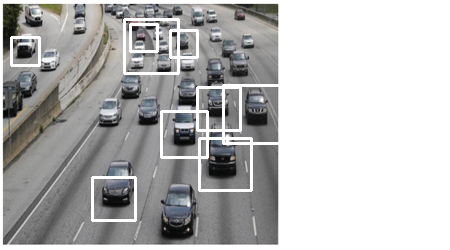

In [23]:
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(
      image_arr, (x,y),(x+w,y+h),
      (255,0,0), 2
  )
  cnt+=1
print(cnt, " bus's found")
Image.fromarray(image_arr)

In [24]:
cascade_src =  '/content/cars.xml'
video_src = '/content/cars.mp4'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)
video = cv2.VideoWriter(
    'result.avi',
    cv2.VideoWriter_fourcc(*"DIVX"), 15, (450,250)
)


# GUI BASED IMPLEMENTATION

In [26]:
# Load Cascade Classifiers (Upload your Haar cascades if not available)
car_cascade_src = '/content/cars.xml'   # Make sure cars.xml is available in your Colab environment
bus_cascade_src = '/content/Bus_front.xml'  # Make sure Bus_front.xml is available in your Colab environment
car_cascade = cv2.CascadeClassifier(car_cascade_src)
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)


Saving cars.jpg to cars (2).jpg
Cars detected: 1
Buses detected: 0


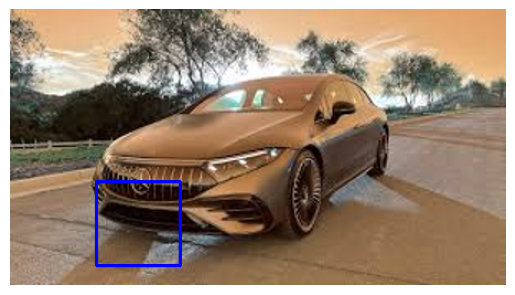

In [32]:
# Upload an image file
uploaded = files.upload()
for filename in uploaded.keys():
    file_path = filename  # File path of uploaded image

# Read and process the uploaded image
image = Image.open(file_path)
image = image.resize((450, 250))
image_arr = np.array(image)

# Convert to grayscale
gray = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)

# Detect cars and buses
cars = car_cascade.detectMultiScale(gray, 1.1, 1)
buses = bus_cascade.detectMultiScale(gray, 1.1, 1)

# Draw rectangles around detected vehicles and count them
car_count, bus_count = 0, 0
for (x, y, w, h) in cars:
    cv2.rectangle(image_arr, (x, y), (x + w, y + h), (255, 0, 0), 2)
    car_count += 1
for (x, y, w, h) in buses:
    cv2.rectangle(image_arr, (x, y), (x + w, y + h), (0, 255, 0), 2)
    bus_count += 1
# Display the image with detections and counts
print(f"Cars detected: {car_count}")
print(f"Buses detected: {bus_count}")

# Show the image with detected vehicles
plt.imshow(cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
